In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
#from sklearn import datasets
#from sklearn import preprocessing
#from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, initializers
from tensorflow.keras.utils import plot_model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import (Input, Dense, Dropout, Activation,
                                     BatchNormalization, Flatten,
                                     Conv2D, MaxPooling2D,
                                     GlobalAveragePooling2D)

import os
import cv2

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# 檢查有沒有 GPU
#import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
# Not enough GPU hardware devices available
# assert len(physical_devices) > 0

tf.config.experimental.set_memory_growth(physical_devices[0], True)

import tensorflow.keras.backend as K
K.clear_session()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


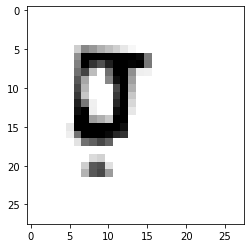

(28, 28)

In [2]:
image = cv2.imread(
    "/home/jovyan/test1/water_aug/0/0000.bmp", 0)
#    "/home/jovyan/at083-group23/aia_meter_datasets/0/20190828101256.bmp", 0)
#image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image, cmap="gray")
plt.show()
image.shape

In [3]:
image.ndim

2

In [4]:
image.dtype

dtype('uint8')

In [5]:
data_path = "/home/jovyan/test1/water_aug"
#data_path = "/home/jovyan/at083-group23/aia_meter_datasets"

x_data_list = []
y_data_list = []
for roots, dirs, files in os.walk(data_path):
    for each in files:
        if each.find('checkpoint') == -1:
            x_data_list.append(os.path.join(roots, each))
            y_data_list.append(roots.split("/")[-1])

In [6]:
#img_size = 224
#img_size = 28

/home/jovyan/test1/water_aug/7/1555.bmp
(28, 28)


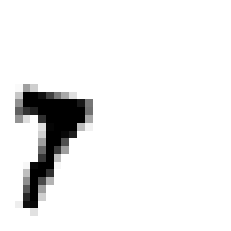

In [7]:
print(x_data_list[0])
img = cv2.imread(x_data_list[0], 0)
#img = cv2.resize(img, (img_size, img_size))
print(img.shape)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()

In [8]:
#img = img[..., np.newaxis]
print(img.shape)

(28, 28)


In [9]:
def load_img(data_list):
    data_img = []
    for each in tqdm(data_list):
        img = cv2.imread(each, 0)
        #img = cv2.resize(img, (img_size, img_size))
        data_img.append(img[..., np.newaxis])
        #data_img.append(img)

    return np.array(data_img).astype('float32')/255.
#    return np.array(data_img).astype('float32')

In [10]:
x_data = load_img(x_data_list)

100%|██████████| 33240/33240 [00:01<00:00, 31563.59it/s]


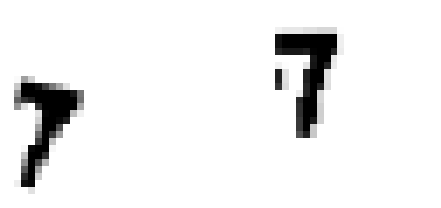

In [11]:
# show image
plt.figure(figsize=(16, 8))
for i in range(2):
    plt.subplot(2, 4, i+1)
    plt.imshow(x_data[i][..., 0], cmap='gray')
    #plt.imshow(x_data[i][:, :, ::-1])
    plt.axis('off')
plt.show()

In [12]:
y_data_list = pd.DataFrame(y_data_list, columns=['label'])
uniques = y_data_list['label'].value_counts().index
counts = y_data_list['label'].value_counts().values
#print(y_data_list.sample(10))
print(uniques)
print('10 + 10 =', uniques.size)

Index(['2', '6', '3', '0', '1', '5', '9', '8', '4', '7', '3-4', '4-5', '9-0',
       '7-8', '0-1', '2-3', '5-6', '8-9', '1-2', '6-7'],
      dtype='object')
10 + 10 = 20


In [13]:
a = pd.DataFrame(uniques.sort_values(), columns=['label'])
print(a.info())
print(a.head(15))

a.to_csv('/home/jovyan/at083-group23/mapping2.txt', float_format=None, 
         columns=['label'], index=True, index_label='idx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
label    20 non-null object
dtypes: object(1)
memory usage: 288.0+ bytes
None
   label
0      0
1    0-1
2      1
3    1-2
4      2
5    2-3
6      3
7    3-4
8      4
9    4-5
10     5
11   5-6
12     6
13   6-7
14     7


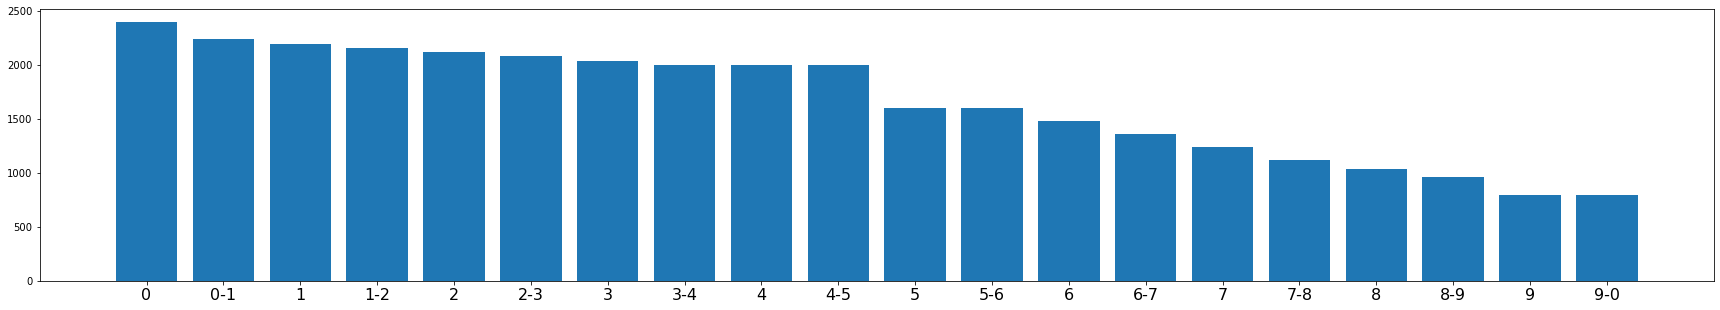

In [14]:
plt.figure(figsize=(30, 5))
plt.bar(uniques.sort_values(), counts)
plt.xticks(fontsize=16)
plt.show()

In [15]:
class_path = "/home/jovyan/at083-group23/"
class_map = pd.read_csv(os.path.join(class_path, 'mapping2.txt'),
                        header=0, names=['label', 'idx'], index_col=['idx'], 
                        usecols=None, dtype=None)
print(class_map.info())
print(class_map.head(15))
class_map = class_map.to_dict()['label']

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 9-0
Data columns (total 1 columns):
label    20 non-null int64
dtypes: int64(1)
memory usage: 320.0+ bytes
None
     label
idx       
0        0
0-1      1
1        2
1-2      3
2        4
2-3      5
3        6
3-4      7
4        8
4-5      9
5       10
5-6     11
6       12
6-7     13
7       14


In [16]:
class_map

{'0': 0,
 '0-1': 1,
 '1': 2,
 '1-2': 3,
 '2': 4,
 '2-3': 5,
 '3': 6,
 '3-4': 7,
 '4': 8,
 '4-5': 9,
 '5': 10,
 '5-6': 11,
 '6': 12,
 '6-7': 13,
 '7': 14,
 '7-8': 15,
 '8': 16,
 '8-9': 17,
 '9': 18,
 '9-0': 19}

In [17]:
y_data = y_data_list['label'].map(class_map).values.copy()

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.1,
                                                    random_state=10,
                                                    stratify=y_data)

In [18]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (29916, 28, 28, 1)
x_test shape: (3324, 28, 28, 1)


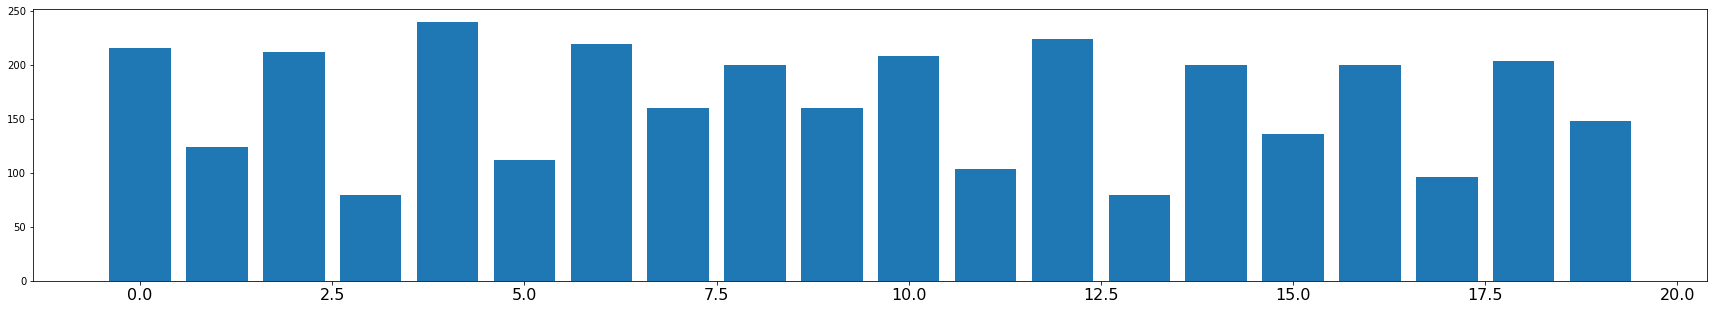

In [19]:
uniques, counts = np.unique(y_test, return_counts=True)
plt.figure(figsize=(30, 5))
plt.bar(uniques, counts)
plt.xticks(fontsize=16)
plt.show()

In [20]:
y_train[0:10]    # 0:10筆的類別

array([ 2, 18,  8, 10, 15, 10, 18, 10,  7, 12])

In [21]:
# 將訓練資料與測試資料的 label，進行 Onehot encoding 轉換
num_classes = len(uniques)

y_train = np.eye(num_classes, dtype='float32')[y_train]
y_test = np.eye(num_classes, dtype='float32')[y_test]

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (29916, 20)
y_test shape: (3324, 20)


In [22]:
# Flatten the input data

x_train = Flatten()(x_train)
x_train = x_train.numpy()
x_test = Flatten()(x_test)
x_test = x_test.numpy()

In [23]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (29916, 784)
x_test shape: (3324, 784)


In [24]:
# 選擇 Keras 的 API 寫法 -- DNN

inputs = Input(shape=x_train.shape[1:])
#inputs = Input(shape=(img_size, img_size, 1))

# 第一層
# 設定ReLU為激活函數。
x = Dense(256, activation='relu')(inputs)

# 第二層 
# 設定ReLU為激活函數。
x = Dense(128, activation='relu')(x)

# 第三層 
# 設定ReLU為激活函數。
x = Dense(64, activation='relu')(x)

outputs = Dense(num_classes, activation='softmax')(x)


dnn_model = Model(inputs=inputs, outputs=outputs)

In [25]:
print(dnn_model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1300      
Total params: 243,412
Trainable params: 243,412
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
model_dir = 'dnn_model-logs-w'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

logfiles = model_dir + '/{}-{}'.format('basic_model', dnn_model.__class__.__name__)
model_cbk = keras.callbacks.TensorBoard(log_dir=logfiles,
                                        histogram_freq=1)

modelfiles = model_dir + '/{}-best-model-w.h5'.format('basic_model')
model_mckp = keras.callbacks.ModelCheckpoint(modelfiles,
                                             monitor='val_accuracy',
                                             save_best_only=True)

earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                          patience=5,
                                          verbose=1)


callbacks_list = [model_cbk, model_mckp, earlystop]

In [27]:
# 編譯模型
# 選用 Adam 為 optimizer
learning_rate = 1e-3
optimizer = keras.optimizers.Adam(lr=learning_rate)



dnn_model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

In [28]:

batch_size = 32
epochs = 300

num_step = x_train.shape[0] // batch_size + 1


In [119]:

dnn_history = dnn_model.fit(x_train, y_train,
                            batch_size=batch_size,
                            steps_per_epoch=num_step,
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            verbose=2,
                            callbacks=callbacks_list)


Train on 29916 samples, validate on 3324 samples
Epoch 1/300
29916/29916 - 2s - loss: 0.3268 - accuracy: 0.8751 - val_loss: 0.4631 - val_accuracy: 0.8351
Epoch 2/300
29916/29916 - 2s - loss: 0.3472 - accuracy: 0.8679 - val_loss: 0.3761 - val_accuracy: 0.8691
Epoch 3/300
29916/29916 - 2s - loss: 0.3428 - accuracy: 0.8722 - val_loss: 0.5612 - val_accuracy: 0.8192
Epoch 4/300
29916/29916 - 2s - loss: 0.3501 - accuracy: 0.8679 - val_loss: 0.3959 - val_accuracy: 0.8544
Epoch 5/300
29916/29916 - 2s - loss: 0.3481 - accuracy: 0.8688 - val_loss: 0.4463 - val_accuracy: 0.8357
Epoch 6/300
29916/29916 - 2s - loss: 0.3334 - accuracy: 0.8732 - val_loss: 0.4373 - val_accuracy: 0.8508
Epoch 7/300
29916/29916 - 2s - loss: 0.3482 - accuracy: 0.8672 - val_loss: 0.4362 - val_accuracy: 0.8508
Epoch 00007: early stopping


In [120]:
best_model = "./dnn_model-logs-w/basic_model-best-model-w.h5"
dnn_model = load_model(best_model)

In [121]:
loss, acc = dnn_model.evaluate(x_test, y_test, verbose=2)

3324/1 - 0s - loss: 0.3892 - accuracy: 0.8691


In [122]:
y_pred = dnn_model.predict(x_test)
print(y_pred[:3])
y_pred = y_pred.argmax(-1)
print(y_pred[:3])

[[6.9573579e-14 4.5533205e-15 1.7292351e-22 6.2486595e-28 3.6034142e-16
  2.8574189e-14 2.2114800e-15 5.0224048e-24 4.2456773e-33 8.2842937e-27
  9.9948800e-01 3.2162973e-06 1.9364170e-05 4.9872838e-06 5.9417837e-20
  1.9232563e-18 4.9405192e-11 2.4611124e-10 4.8427694e-04 1.9853100e-07]
 [1.3148575e-03 5.8680837e-07 5.5602611e-10 1.9467258e-07 7.5182006e-02
  3.0283736e-08 9.2348939e-01 8.2920687e-06 4.8376048e-33 1.2451877e-06
  3.1503328e-06 3.3673009e-10 1.9157042e-07 5.2553547e-12 1.3699646e-18
  8.1838923e-20 2.6550615e-24 2.9803399e-10 5.7467384e-14 6.2118524e-08]
 [1.8439605e-04 2.2460472e-04 1.9903722e-05 7.6322170e-04 3.0410031e-02
  3.4892462e-02 9.2790215e-05 4.7642638e-06 1.6189673e-16 2.4987705e-07
  2.3511417e-05 1.4731454e-04 4.4067024e-06 7.2119101e-06 5.5768822e-08
  1.8364351e-12 5.2985932e-10 2.6441679e-05 5.3838428e-13 9.3319857e-01]]
[10  6 19]


In [123]:
print(accuracy_score(y_test.argmax(-1), y_pred))
#print(confusion_matrix(y_test.argmax(-1), y_pred))
confusion_matrix(y_test.argmax(-1), y_pred)

0.8691335740072202


array([[198,   4,   0,   0,   0,   2,   5,   0,   0,   0,   0,   0,   4,
          2,   0,   0,   1,   0,   0,   0],
       [  5, 105,   0,   0,   0,   0,   0,   2,   0,   3,   0,   0,   0,
          5,   1,   0,   0,   3,   0,   0],
       [  1,   0, 197,   8,   1,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   4,   0,   0,   0,   0,   0],
       [  0,   0,   3,  64,   6,   0,   0,   3,   0,   3,   0,   0,   0,
          0,   0,   1,   0,   0,   0,   0],
       [  0,   0,   4,   5, 190,  16,  16,   0,   0,   1,   1,   0,   1,
          0,   0,   0,   0,   1,   3,   2],
       [  1,   1,   2,   0,   9,  91,   0,   0,   0,   0,   0,   2,   0,
          0,   0,   0,   1,   0,   1,   4],
       [  6,   0,   0,   0,   4,   0, 198,  11,   0,   0,   1,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   2,   1,   0,   4, 145,   0,   5,   0,   1,   0,
          0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   1, 195,   0,   0,  

In [124]:
class_names = np.array([each for each in class_map.keys()])

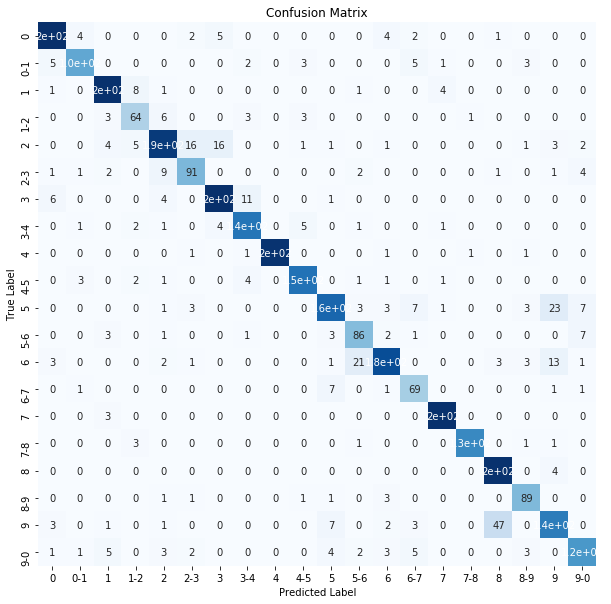

In [125]:
import seaborn as sns

matrix = confusion_matrix(y_test.argmax(-1), y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cbar=False, cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

# Save figure first to prevent black after show figure.
plt.savefig('./Confusion Matrix-w.png')

plt.show()